In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import *
import matplotlib
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift , estimate_bandwidth
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, precision_score
from sklearn.metrics import recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster, mixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split, GridSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [55]:
df1=pd.read_csv('train.csv')

In [56]:
df1.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [57]:
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [59]:
df1.loc[((df1.Product_Category_2.isnull()==True) & (df1.Product_Category_3.isnull()==True))]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [60]:
df1['Product_Category_2'].fillna(0, inplace=True)
df1['Product_Category_3'].fillna(0, inplace=True)

In [61]:
df1['Product_Category_2']=df1['Product_Category_2'].astype(np.int64)
df1['Product_Category_3']=df1['Product_Category_3'].astype(np.int64)

We have seen so far that the null values in the 'Product 2' & 'Product 3' have null values if the custome buys the 'Product 1'

But some customers buy the Product 1 + Product 2 OR Produt 3

In [62]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [63]:
df1.shape

(550068, 12)

It means that their are multiple duplicates 'User_ID' and 'Product_ID'
Now check for some duplicates to confirm this 

hmmm, now thats intresting , it shows that the unique ID's for customers are 5891 in which the customer odeered multiple times

## 1) Data Cleaning

In [64]:
df1_null=round(100*(df1.isnull().sum())/len(df1),2)
df1_null

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

This % shows that their are large % of data which is missing for the missing data
* 1- we can drop those null values if the data is not much empty
* 2- we can replace that null values by the suitable values

In [65]:
df1.Occupation.max()

20

### Numerical Features:
* Occupation
* Stay_In_Current_City_Years
* Marital_Status
* Product_Category_1
* Product_Category_2
* Product_Category_3
* Purchase

### Categorical Features:
* Gender
* Age
* City_Category

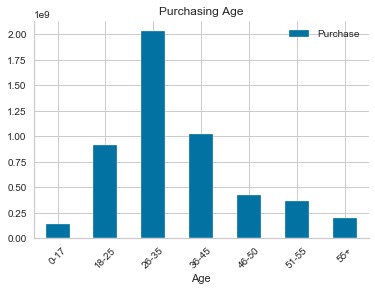

In [66]:
df1.groupby(["Age"]).sum()[["Purchase"]].plot.bar(title="Purchasing Age")
plt.xticks(rotation=45)
sns.despine()

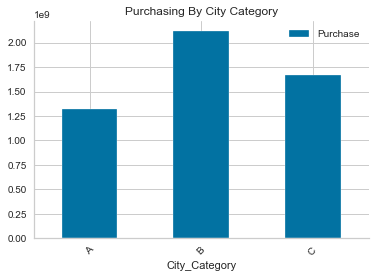

In [67]:
df1.groupby(["City_Category"]).sum()[["Purchase"]].plot.bar(title="Purchasing By City Category")
plt.xticks(rotation=45)
sns.despine()

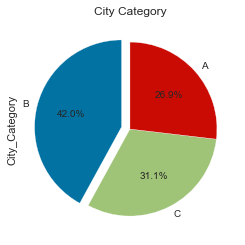

In [68]:
df1["City_Category"].value_counts().plot.pie(title="City Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=False)

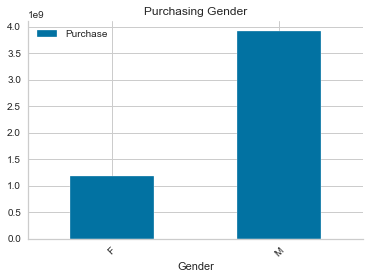

In [69]:
df1.groupby(["Gender"]).sum()[["Purchase"]].plot.bar(title="Purchasing Gender")
plt.xticks(rotation=45)
sns.despine()

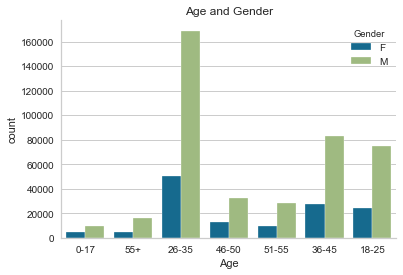

In [70]:
sns.countplot(df1['Age'], hue=df1['Gender']).set_title('Age and Gender')
sns.despine()

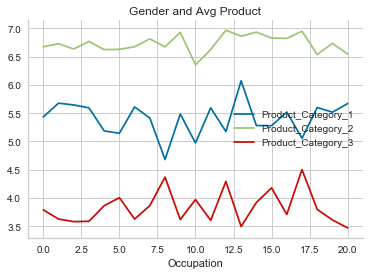

In [71]:
df1.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.line(title="Gender and Avg Product")
sns.despine()


### To check In  each gender related to age brackets spent how much

First we check the ration for each gender

In [72]:
df1['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [73]:
grouped=df1.groupby(['Gender','Age'])
grouped.agg('mean')['Purchase']

Gender  Age  
F       0-17     8338.771985
        18-25    8343.180201
        26-35    8728.251754
        36-45    8959.844056
        46-50    8842.098947
        51-55    9042.449666
        55+      9007.036199
M       0-17     9235.173670
        18-25    9440.942971
        26-35    9410.337578
        36-45    9453.193643
        46-50    9357.471509
        51-55    9705.094802
        55+      9438.195603
Name: Purchase, dtype: float64

This gives us a very basic insight that males in every age group spent more money then women

In [74]:
functions=['count','mean','max','min','std','sum']
grouped['Purchase'].agg(functions)

count         mean    max  min          std         sum
Gender Age                                                            
F      0-17     5083  8338.771985  23866   12  4850.032944    42385978
       18-25   24628  8343.180201  23936   12  4688.707126   205475842
       26-35   50752  8728.251754  23955   12  4718.826059   442976233
       36-45   27170  8959.844056  23948   12  4833.296586   243438963
       46-50   13199  8842.098947  23920   12  4795.838799   116706864
       51-55    9894  9042.449666  23959   12  4848.718221    89465997
       55+      5083  9007.036199  23899   12  4801.556874    45782765
M      0-17    10019  9235.173670  23955   12  5212.954953    92527205
       18-25   75032  9440.942971  23958   12  5113.697699   708372833
       26-35  168835  9410.337578  23961   12  5084.399369  1588794345
       36-45   82843  9453.193643  23960   12  5077.688456   783130921
       46-50   32502  9357.471509  23960   12  5027.596264   304136539
       51-55   28607  9705.094802  23960   12  5156.494783   277633647
       55+     16421  9438.195603  23960   12  5070.529241   154984610

The first think should be noticed is that the males are having high average amount of purchasing rather than the females and we can also add that the older age in both gender having high  average purchasing rather than the younger age

## Bucket Analysis

In [75]:
import seaborn as sns

sns.set_style('whitegrid')

In [76]:
df2=grouped['Purchase'].sum().reset_index()
df2

,Gender,Age,Purchase
0,F,0-17,42385978
1,F,18-25,205475842
2,F,26-35,442976233
3,F,36-45,243438963
4,F,46-50,116706864
5,F,51-55,89465997
6,F,55+,45782765
7,M,0-17,92527205
8,M,18-25,708372833
9,M,26-35,1588794345


In [77]:
pd.qcut(df2['Purchase'], q=4)

0     (42385977.999, 98572119.75]
1      (98572119.75, 224457402.5]
2     (408266309.5, 1588794345.0]
3      (224457402.5, 408266309.5]
4      (98572119.75, 224457402.5]
5     (42385977.999, 98572119.75]
6     (42385977.999, 98572119.75]
7     (42385977.999, 98572119.75]
8     (408266309.5, 1588794345.0]
9     (408266309.5, 1588794345.0]
10    (408266309.5, 1588794345.0]
11     (224457402.5, 408266309.5]
12     (224457402.5, 408266309.5]
13     (98572119.75, 224457402.5]
Name: Purchase, dtype: category
Categories (4, interval[float64]): [(42385977.999, 98572119.75] < (98572119.75, 224457402.5] < (224457402.5, 408266309.5] < (408266309.5, 1588794345.0]]


* (224457402.5, 408266309.5)
*  (408266309.5, 1588794345.0)
*  (42385977.999, 98572119.75)
*  (98572119.75, 224457402.5)

In [78]:
df2['quantile_purchase_4']=pd.qcut(df2['Purchase'],q=4)
df2

,Gender,Age,Purchase,quantile_purchase_4
0,F,0-17,42385978,"(42385977.999, 98572119.75]"
1,F,18-25,205475842,"(98572119.75, 224457402.5]"
2,F,26-35,442976233,"(408266309.5, 1588794345.0]"
3,F,36-45,243438963,"(224457402.5, 408266309.5]"
4,F,46-50,116706864,"(98572119.75, 224457402.5]"
5,F,51-55,89465997,"(42385977.999, 98572119.75]"
6,F,55+,45782765,"(42385977.999, 98572119.75]"
7,M,0-17,92527205,"(42385977.999, 98572119.75]"
8,M,18-25,708372833,"(408266309.5, 1588794345.0]"
9,M,26-35,1588794345,"(408266309.5, 1588794345.0]"


In [79]:
df2['quantile_purchase_4'].value_counts()

(408266309.5, 1588794345.0]    4
(42385977.999, 98572119.75]    4
(224457402.5, 408266309.5]     3
(98572119.75, 224457402.5]     3
Name: quantile_purchase_4, dtype: int64

In [80]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [81]:
corr=df1.corr()
corr.shape

(7, 7)

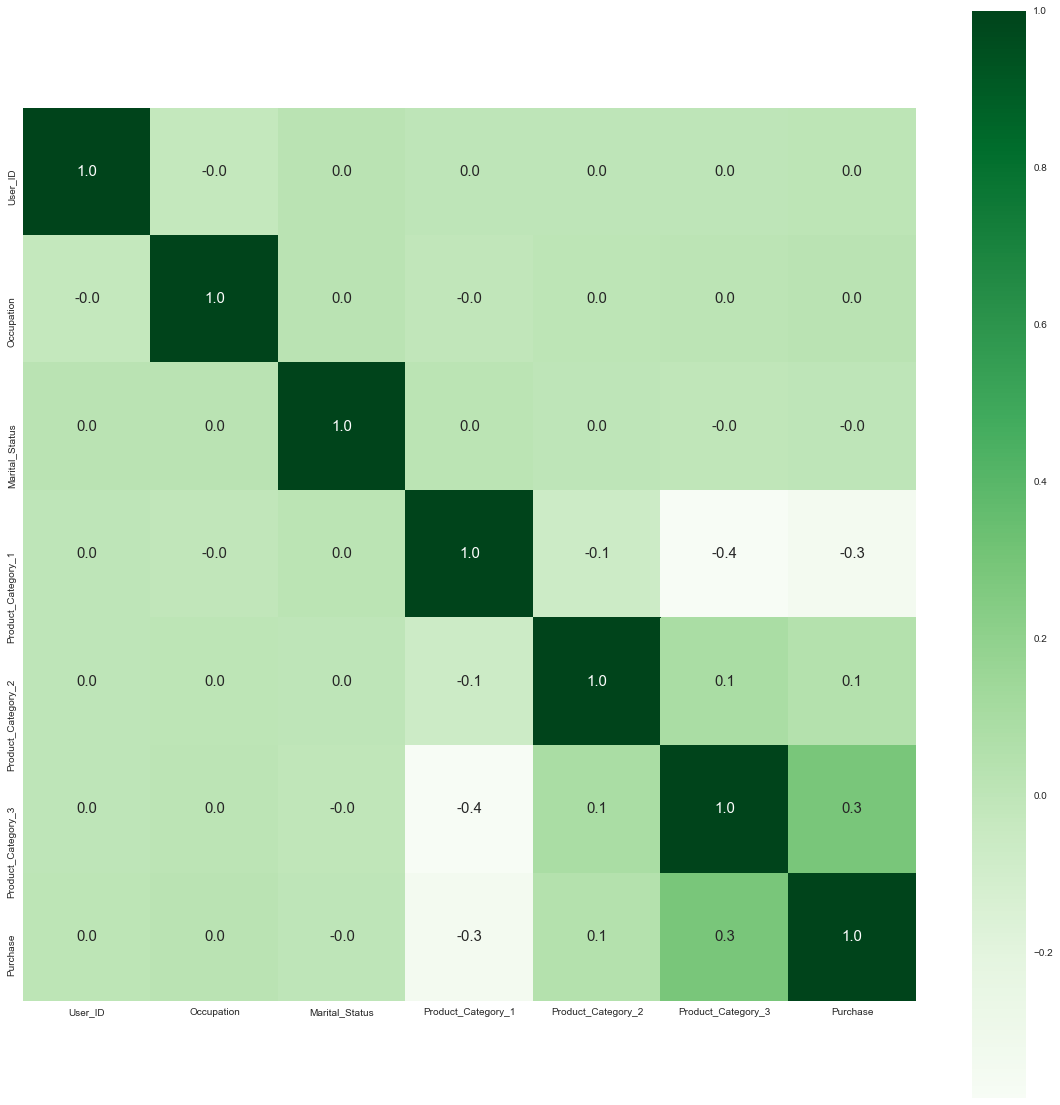

In [82]:
plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True, square=True, fmt='.1f',
           annot=True,annot_kws={'size':15},cmap='Greens')

## Apply Label Encoding on the Categorical columns

In [83]:
objects=['Gender','Age','City_Category']

label_encoders= dict()

for i in objects:
    print(i)
    le = LabelEncoder()
    df1[i]=le.fit_transform(df1[i])
    
    label_encoders[i]= le

Gender
Age
City_Category


In [84]:
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,0,0,7969
5,1000003,P00193542,1,2,15,0,3,0,1,2,0,15227
6,1000004,P00184942,1,4,7,1,2,1,1,8,17,19215
7,1000004,P00346142,1,4,7,1,2,1,1,15,0,15854
8,1000004,P0097242,1,4,7,1,2,1,1,16,0,15686
9,1000005,P00274942,1,2,20,0,1,1,8,0,0,7871


In [85]:
df1.dtypes

User_ID                        int64
Product_ID                    object
Gender                         int32
Age                            int32
Occupation                     int64
City_Category                  int32
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [86]:
# which indicates the number of unique categories a customer has shopped from

conditions = [
    (df1['Product_Category_1'] != 0) & (df1['Product_Category_2'] == 0) & (df1['Product_Category_3'] == 0),
    (df1['Product_Category_1'] != 0) & (df1['Product_Category_2'] != 0) & (df1['Product_Category_3'] == 0),
    (df1['Product_Category_1'] != 0) & (df1['Product_Category_2'] != 0) & (df1['Product_Category_3'] != 0)]
choices = [1, 2, 3]
df1['Category_Count'] = np.select(conditions, choices, default=0)

## Merge all the duplicates product ID's

In [87]:
# Introducing a new feature 'Product_Score',
# which indicates the frequency of a product relative to the maximum frequency of a product in the entire dataset
# frequency means the number of times a product appears in the dataset
df1['Product_Score'] = 0.0
required_product_data = df1[['Product_ID', 'Product_Score']]

# marking the default frequency as 1 so that increments at each iteration
required_product_data['Frequency'] = 1

# group the data using Product_ID, which returns sum of frequencies (total) for each Product_ID
grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [88]:
# maximum frequency of a product in the dataframe
max_frequency = grouped_product_data['Frequency'].max()


final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

# divide each product's frequency with maximum frequency
# apply to each row in the dataframe

final_product_data['Product_Score']=final_product_data['Frequency']/ max_frequency


In [89]:
final_product_data

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149
...,...,...,...
3626,P0099442,0.106383,200
3627,P0099642,0.006915,13
3628,P0099742,0.067021,126
3629,P0099842,0.054255,102


In [90]:
df1.drop('User_ID', axis=1, inplace=True)

In [91]:
df1.drop('Product_ID', axis=1, inplace=True)

In [92]:
df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [93]:
df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].astype('int')

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int32  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int32  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  int64  
 8   Product_Category_3          550068 non-null  int64  
 9   Purchase                    550068 non-null  int64  
 10  Category_Count              550068 non-null  int32  
 11  Product_Score               550068 non-null  float64
dtypes: float64(1), int32(5), int64(6)
memory usage: 39.9 MB


### Spliting the train dataset

In [95]:
X=df1[['Product_Category_1']]
Y=df1['Purchase']

## Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [101]:
for col in x.columns:
    X[col]=scaler.fit_transform(X[col].values.reshape(-1,1))

### Creating a train test split

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [103]:
print('X train shape:',X_train.shape)
print('X test shape:',X_test.shape)
print('Y train shape:',Y_train.shape)
print('Y  Test shape:',Y_test.shape)

X train shape: (440054, 1)
X test shape: (110014, 1)
Y train shape: (440054,)
Y  Test shape: (110014,)


# Data Modeling

## 1- Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [131]:
lr.fit(X,Y)
print('The R square is :', lr.score(X,Y))

The R square is : 0.11813198999653951


In [115]:
Y_pred_lr=lr.predict(X_train)

In [116]:
Y_pred_lr

array([11195.70624383,  9441.28380998,  8125.46698459, ...,
        9441.28380998,  8125.46698459,  9441.28380998])

In [117]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([11195.70624383, 11195.70624383,  8125.46698459, ...,
        8125.46698459,  6809.6501592 , 10318.49502691])

In [110]:
lr.intercept_

9263.968712959126

### The value of 'b1'

In [111]:
lr.coef_

array([-1726.44281333])

In [112]:
Y_hat=lr.predict(X_train)
Y_hat[0:5]

array([11195.70624383,  9441.28380998,  8125.46698459,  8125.46698459,
       11195.70624383])

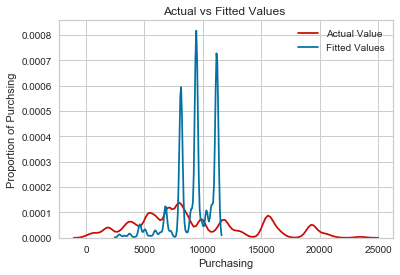

<Figure size 648x364.5 with 0 Axes>

In [114]:

width= 10
height=15

ax1 = sns.distplot(df1['Purchase'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ')
plt.xlabel('Purchasing')
plt.ylabel('Proportion of Purchsing')
plt.figure(figsize=(9, 5.0625))

plt.show()
plt.close()

## Check the features importance for feature selection

In [119]:
pre=df1.drop('Purchase', axis=1)
tar=df1[['Purchase']]

In [120]:
from sklearn.ensemble import ExtraTreesRegressor
selector=ExtraTreesRegressor()


In [121]:
selector.fit(pre,tar)

ExtraTreesRegressor()

In [122]:
feature_imp=selector.feature_importances_

In [123]:
for key,val in enumerate(feature_imp):
    print(key,round((val*100),2))

0 0.66
1 3.16
2 6.85
3 0.91
4 3.59
5 0.9
6 66.41
7 4.49
8 5.11
9 7.92
10 0.0


The value of R^2 is too small so now we apply a multiple linear regression model

## Multiple Linear Regression

For multiple linear regression we use other variables that could be good predictors for Purchase

* Occupation
* Product_Category_2
* Product_Category_3

In [126]:
M=df1[['Occupation','Product_Category_2','Product_Category_3']]
Y=df1['Purchase']

In [127]:
from sklearn.model_selection import train_test_split
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size = 0.2, random_state = 42)

In [128]:
print('M train shape:',M_train.shape)
print('M test shape:',M_test.shape)
print('Y train shape:',Y_train.shape)
print('Y  Test shape:',Y_test.shape)

M train shape: (440054, 3)
M test shape: (110014, 3)
Y train shape: (440054,)
Y  Test shape: (110014,)
